Results of tuning the beaching distance, D, in the Parcels beaching kernel

In [2]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def plot_beach_time(parcelsFileName, ax, label):
    
    pfile = xr.open_dataset(str(parcelsFileName), decode_cf=True)

    beached = np.ma.filled(pfile.variables['beached'], np.nan)
    time = np.ma.filled(pfile.variables['time'], np.nan)

    beach_time = beached.sum(axis=0)
    t1 = (time[1,:] - time[1,0])/(3600000000000) #hours

    ax.plot(t1, beach_time, label=label)
    #ax.set_xlabel('hours')
    ax.set_ylabel('# beached particles')
    ax.legend();

def plot_particles_beached(parcelsFileName, ax):
    
    pfile = xr.open_dataset(str(parcelsFileName), decode_cf=True)

    beached = np.ma.filled(pfile.variables['beached'], np.nan)
    time = np.ma.filled(pfile.variables['time'], np.nan)

    beach_time = beached.sum(axis=0)
    particles_beached = np.diff(beach_time)

    t1 = (time[1,:] - time[1,0])/(3600000000000) #hours
    #t2 = (time[1,:] - time[1,0])/(3600000000000*24) #days
    t_hours = t1[0:len(particles_beached)]
    #t_days = t2[0:len(particles_beached)]

    ax.plot(t_hours, particles_beached)
    #ax.set_xlabel('hours')
    ax.set_ylabel('# beached particles');

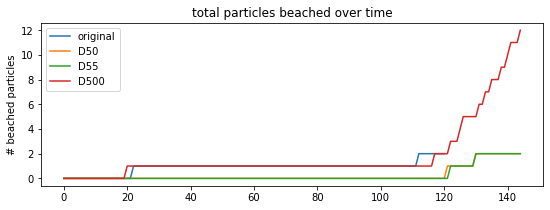

In [19]:
fig, ax = plt.subplots(figsize = (9,3))
ax.set_title('total particles beached over time')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2018-01-01_OP.nc', ax, 'original')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2018-01-01_OP_D50.nc', ax, 'D50')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2018-01-01_OP_D55.nc', ax, 'D55')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2018-01-01_OP_D500_wind.nc', ax, 'D500')

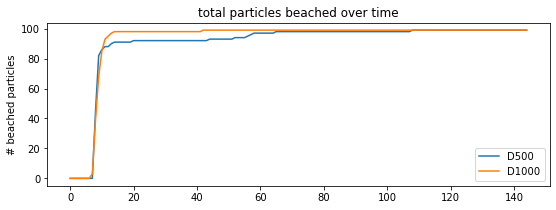

In [20]:
fig, ax = plt.subplots(figsize = (9,3))
ax.set_title('total particles beached over time')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2020-01-01_OP_D500.nc', ax, 'D500')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2020-01-01_OP_D1000.nc', ax, 'D1000')

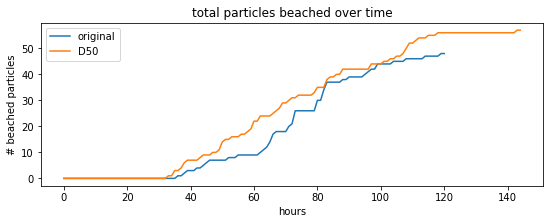

In [21]:
fig, ax = plt.subplots(figsize = (9,3))
ax.set_title('total particles beached over time')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2020-01-19_OP.nc', ax, 'original')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2020-01-19_OP_D50.nc', ax, 'D50')
ax.set_xlabel('hours');

Effects of different conditions on beaching

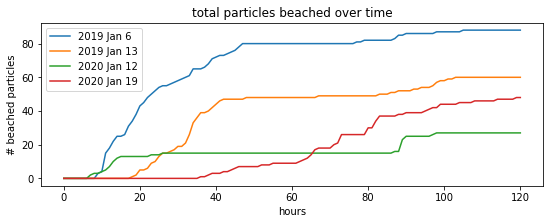

In [14]:
fig, ax = plt.subplots(figsize = (9,3))
ax.set_title('total particles beached over time')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2019-01-06_OP.nc', ax, '2019 Jan 6')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2019-01-13_OP.nc', ax, '2019 Jan 13')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2020-01-12_OP.nc', ax, '2020 Jan 12')
plot_beach_time('results/5b_Turn_Point_Diluted_bitumen2020-01-19_OP.nc', ax, '2020 Jan 19')
ax.set_xlabel('hours');